#**LOAN DEFAULT PREDICTION-R PROGRAMMING**


#Importing Libraries

In [ ]:
#install.packages("dplyr")
library("ggplot2") #to create visualizations of data for EDA
library(dplyr)   # Manipulation of Data uses functions like select and filter
library("ggcorrplot")  #for correlation
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: ignored

#Loading Data

In [ ]:
df <- read.csv("https://raw.githubusercontent.com/SaahilShaikh17/LoanDefaultPrediction/main/Loan_default.csv")

In [ ]:
head(df)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
2,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
3,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
4,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
5,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
6,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1


The above shows us the top 6 values of each feature in our dataframe df.further We will analyse which features are categorcal and which are numerical in nature


#Structure Of Data

In [ ]:
str(df)

'data.frame':	255347 obs. of  18 variables:
 $ LoanID        : chr  "I38PQUQS96" "HPSK72WA7R" "C1OZ6DPJ8Y" "V2KKSFM3UN" ...
 $ Age           : int  56 69 46 32 60 25 38 56 36 40 ...
 $ Income        : int  85994 50432 84208 31713 20437 90298 111188 126802 42053 132784 ...
 $ LoanAmount    : int  50587 124440 129188 44799 9139 90448 177025 155511 92357 228510 ...
 $ CreditScore   : int  520 458 451 743 633 720 429 531 827 480 ...
 $ MonthsEmployed: int  80 15 26 0 8 18 80 67 83 114 ...
 $ NumCreditLines: int  4 1 3 3 4 2 1 4 1 4 ...
 $ InterestRate  : num  15.23 4.81 21.17 7.07 6.51 ...
 $ LoanTerm      : int  36 60 24 24 48 24 12 60 48 48 ...
 $ DTIRatio      : num  0.44 0.68 0.31 0.23 0.73 0.1 0.16 0.43 0.2 0.33 ...
 $ Education     : chr  "Bachelor's" "Master's" "Master's" "High School" ...
 $ EmploymentType: chr  "Full-time" "Full-time" "Unemployed" "Full-time" ...
 $ MaritalStatus : chr  "Divorced" "Married" "Divorced" "Married" ...
 $ HasMortgage   : chr  "Yes" "No" "Yes" "No" ...

As seen above married/single, house ownership car_ownership profession city and state are our categorical variables. As id is a non predictor feature we will be dropping that as it would not contribute to our analysis

#Shape of Data

In [ ]:
num_rows <- nrow(df)
num_cols <- ncol(df)

cat("Number of rows:", num_rows, "\n")
cat("Number of columns:", num_cols)

Number of rows: 255347 
Number of columns: 18

#Exploratory Data Analysis

##Histogram

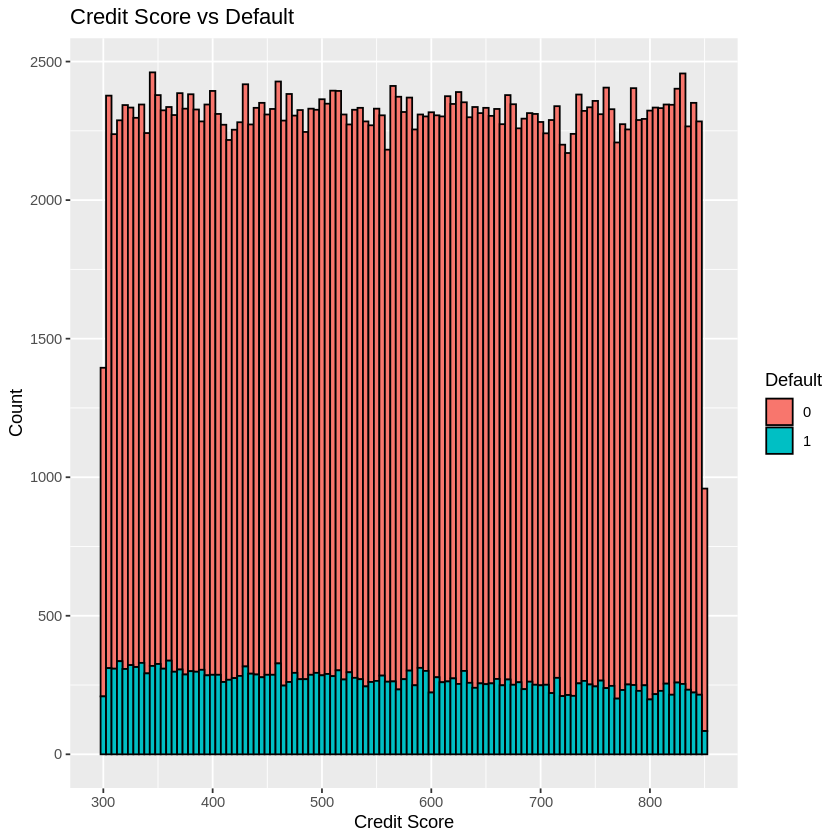

In [ ]:
ggplot(df, aes(x = CreditScore, fill = factor(Default))) +
  geom_histogram(binwidth = 5, color = "black") +
  labs(title = "Credit Score vs Default", x = "Credit Score", y = "Count") +
  scale_fill_discrete(name = "Default")

Here we plot the histogram of column "CreditScore" with respect to defalut

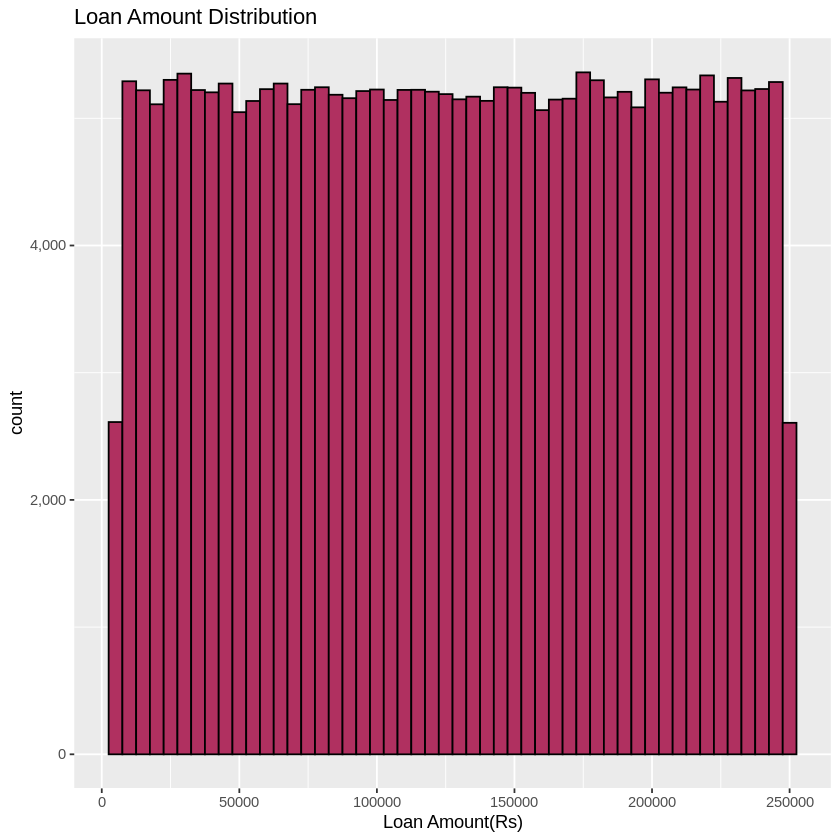

In [ ]:
ggplot(df, aes(x = LoanAmount)) +
  geom_histogram(binwidth = 5000, fill = "maroon", color = "black") +
  labs(title = "Loan Amount Distribution", x = "Loan Amount(Rs)") +
  scale_y_continuous(labels = scales::comma)

Here we plot the histogram of column "LoanAMount"

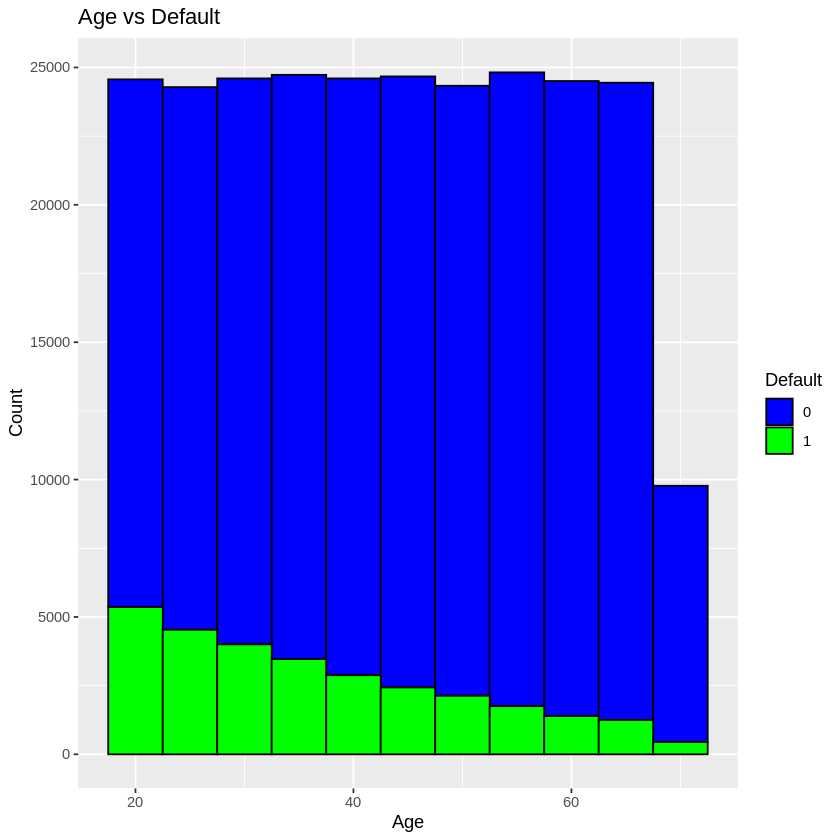

In [ ]:
ggplot(df, aes(x = Age, fill = factor(Default))) +
  geom_histogram(binwidth = 5, color = "black") +
  labs(title = "Age vs Default", x = "Age", y = "Count") +
  scale_fill_manual(values = c("blue","green"), name = "Default")

Here we plot the histogram of column "Age" wrt Deafault

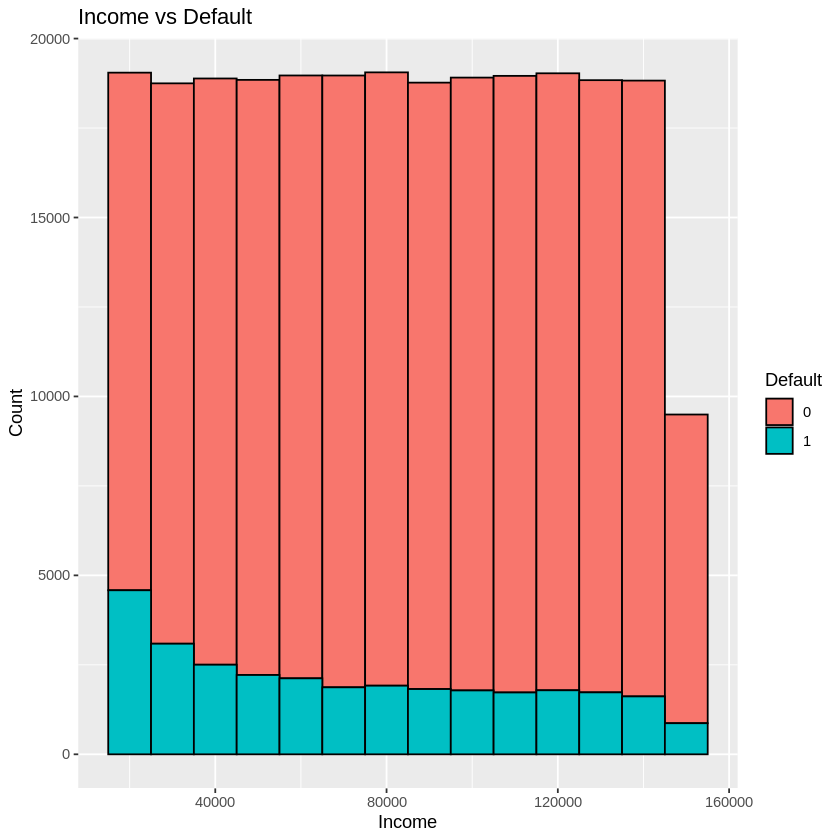

In [ ]:
ggplot(df, aes(x = Income, fill = factor(Default))) +
  geom_histogram(binwidth = 10000, color = "black") +
  labs(title = "Income vs Default", x = "Income", y = "Count") +
  scale_fill_discrete(name = "Default")

Here we plot the histogram of column "Income" wrt Default

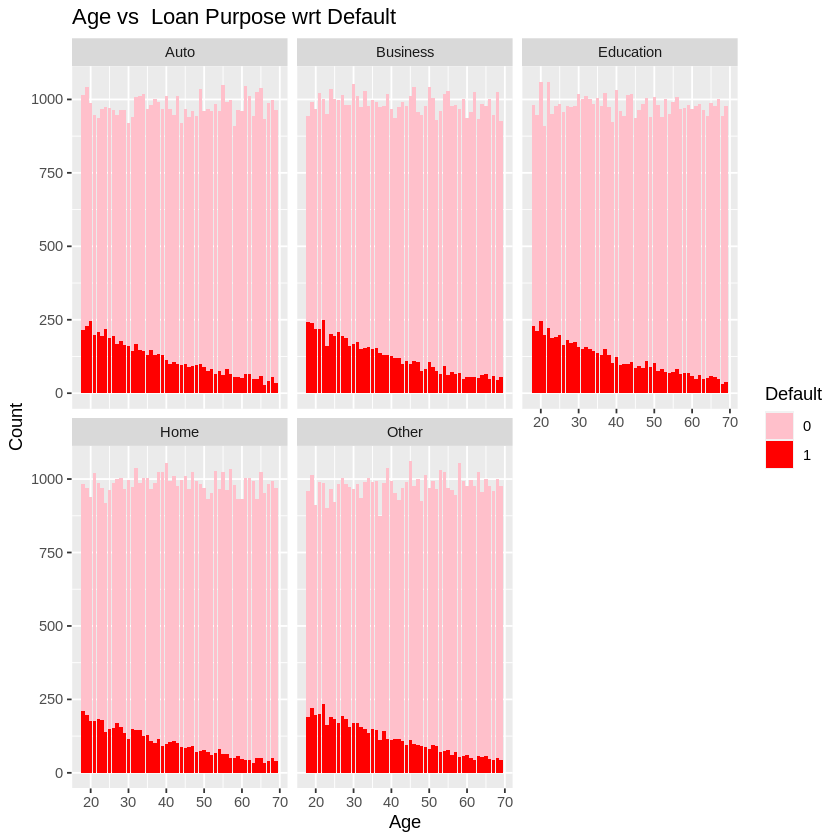

In [ ]:
ggplot(df, aes(x = Age, fill = factor(Default))) +
  geom_bar() +
  labs(title = "Age vs  Loan Purpose wrt Default", x = "Age", y = "Count") +
  facet_wrap(~LoanPurpose) +
  scale_fill_manual(values = c("Pink","red"), name = "Default")

Here we plot the histogram of column "Age" VS "Loan Purpose" wrt Default

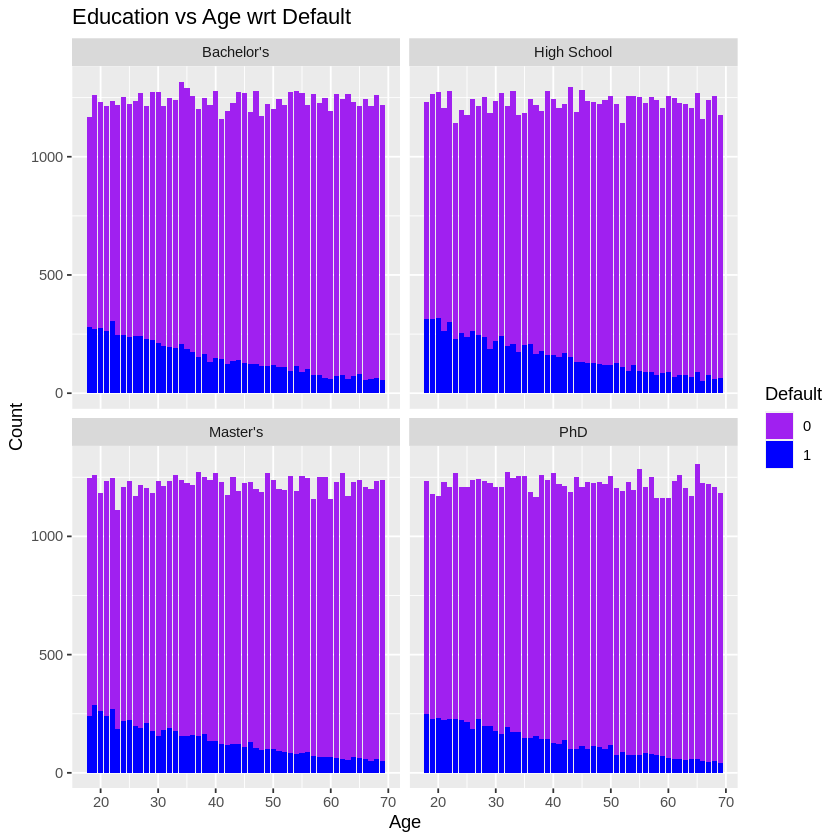

In [ ]:
ggplot(df, aes(x = Age, fill = factor(Default))) +
  geom_bar() +
  labs(title = "Education vs Age wrt Default", x = "Age", y = "Count") +
  facet_wrap(~Education) +
  scale_fill_manual(values = c("Purple","BLue"), name = "Default")

Here we plot the histogram of column "Age" VS "Education" wrt Default

##Box Plot

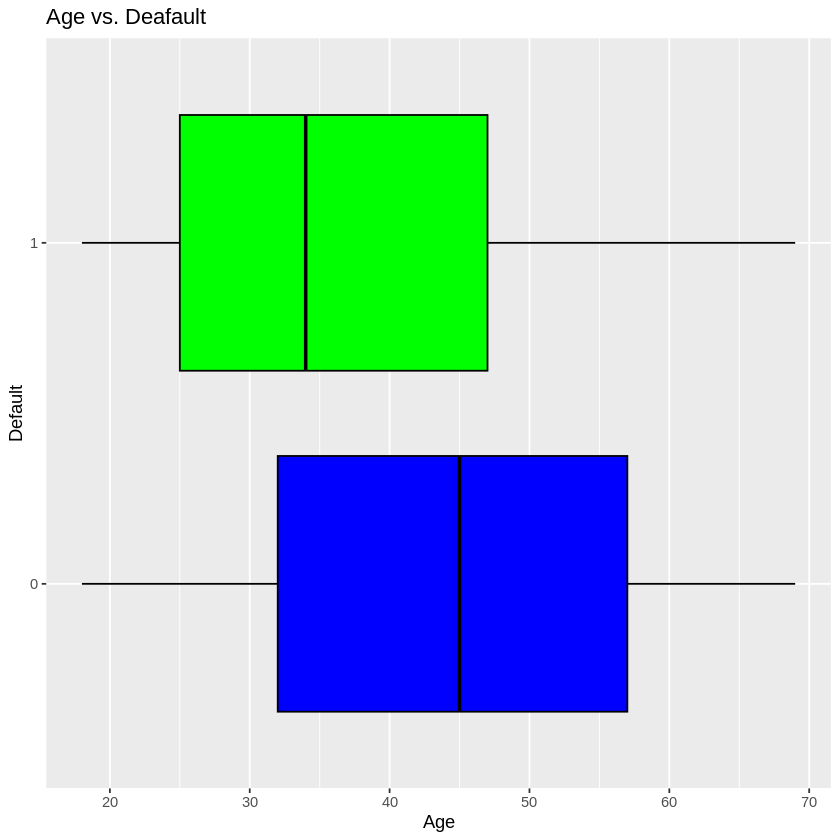

In [ ]:
ggplot(df, aes(x = Age, y = factor(Default))) +
  geom_boxplot(fill = c("blue", "green"), color = "black") +
  labs(title = "Age vs. Deafault", x = "Age", y = "Default") +
  scale_fill_manual( name = "Default", labels = c("0", "1")) +
  theme(legend.position = "none")

Here we plot the boxplot of column "Age" wrt Default

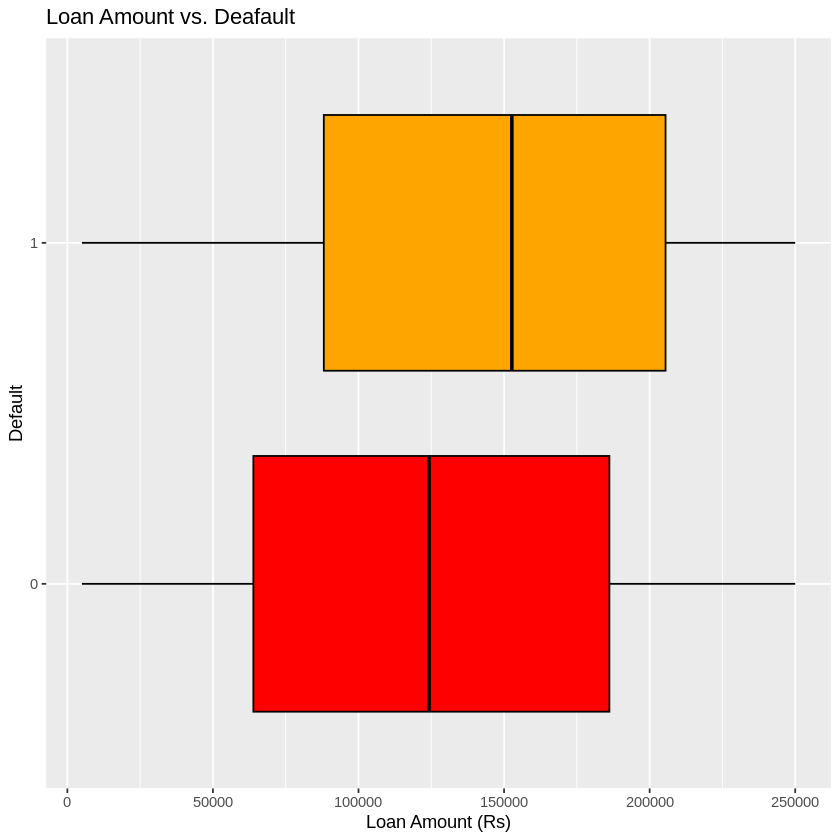

In [ ]:
ggplot(df, aes(x = LoanAmount, y = factor(Default))) +
  geom_boxplot(fill = c("red", "orange"), color = "black") +
  labs(title = "Loan Amount vs. Deafault", x = "Loan Amount (Rs)", y = "Default") +
  scale_fill_manual( name = "Default", labels = c("0", "1")) +
  theme(legend.position = "none")

Here we plot the boxplot of column "LoanAmount" wrt Default

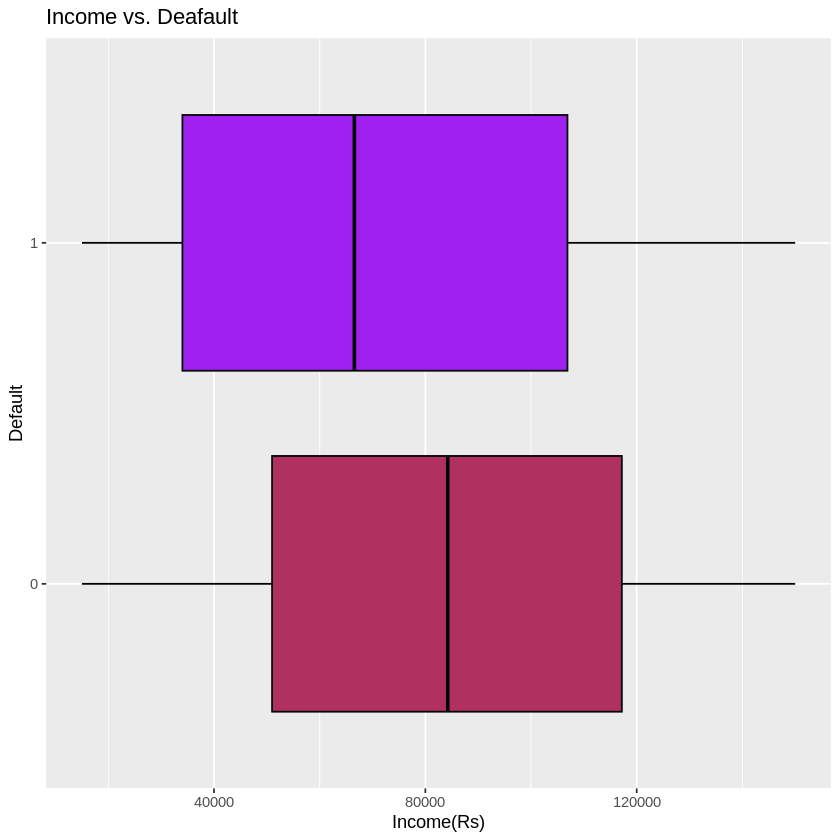

In [ ]:
ggplot(df, aes(x = Income, y = factor(Default))) +
  geom_boxplot(fill = c("maroon", "purple"), color = "black") +
  labs(title = "Income vs. Deafault", x = "Income(Rs)", y = "Default") +
  scale_fill_manual( name = "Default", labels = c("0", "1")) +
  theme(legend.position = "none")

Here we plot the boxplot of column "Income" wrt Default

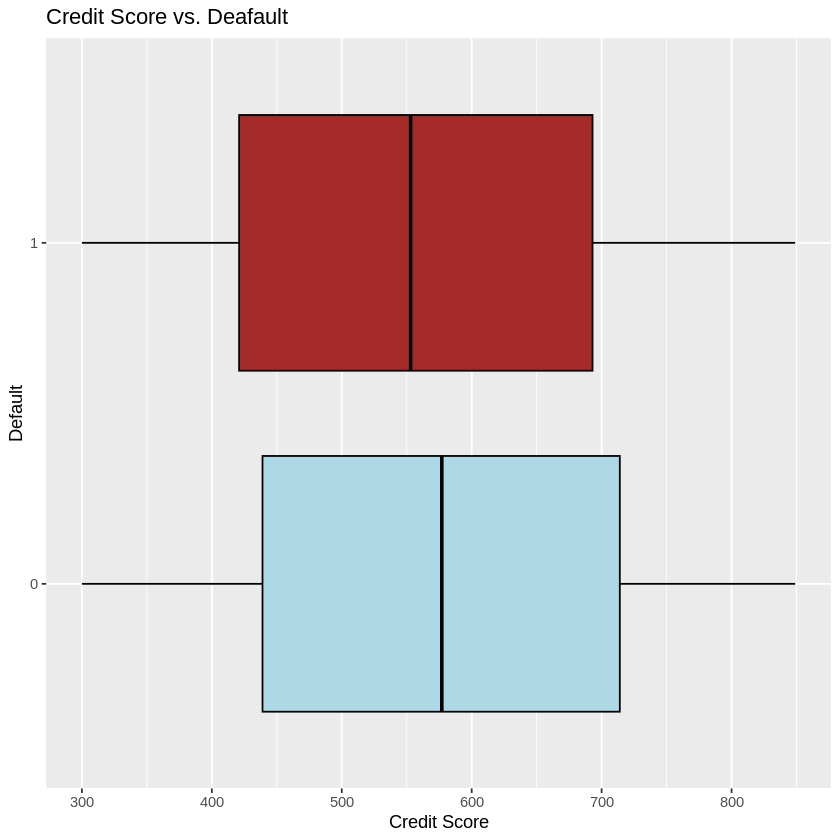

In [ ]:
ggplot(df, aes(x = CreditScore, y = factor(Default))) +
  geom_boxplot(fill = c("light blue", "brown"), color = "black") +
  labs(title = "Credit Score vs. Deafault", x = "Credit Score", y = "Default") +
  scale_fill_manual(values = c("light blue", "brown"), name = "Default", labels = c("0", "1")) +
  theme(legend.position = "none")

Here we plot the boxplot of column "CreditScore" wrt Default

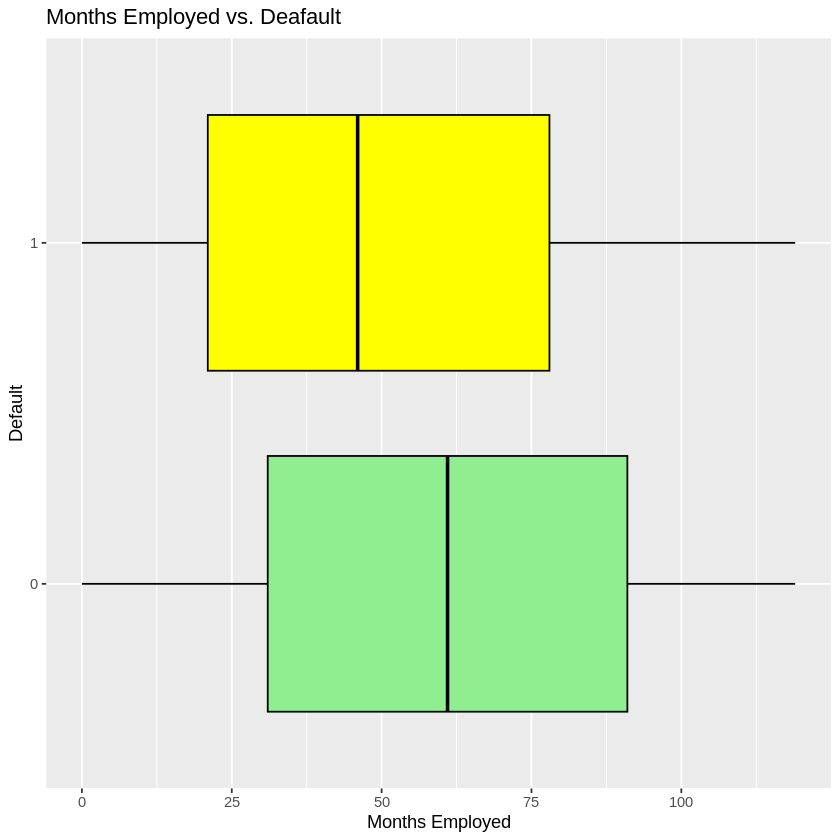

In [ ]:
ggplot(df, aes(x = MonthsEmployed, y = factor(Default))) +
  geom_boxplot(fill = c("light green", "yellow"), color = "black") +
  labs(title = "Months Employed vs. Deafault", x = "Months Employed", y = "Default") +
  scale_fill_manual( name = "Default", labels = c("0", "1")) +
  theme(legend.position = "none")

Here we plot the boxplot of column "MonthsEmployed" wrt Default

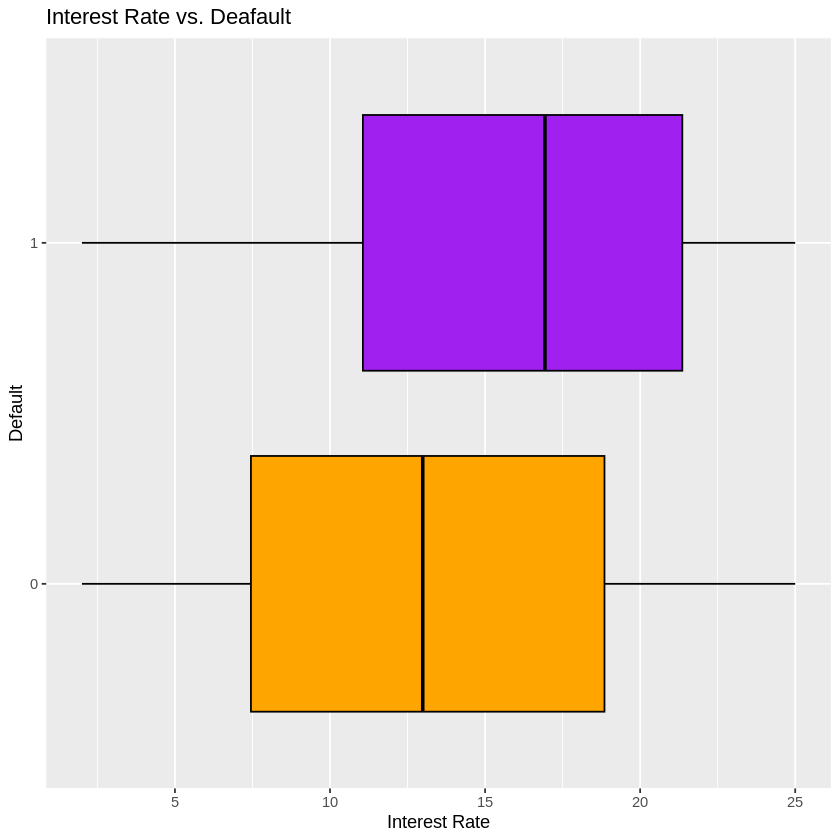

In [ ]:
ggplot(df, aes(x = InterestRate, y = factor(Default))) +
  geom_boxplot(fill = c("orange", "purple"), color = "black") +
  labs(title = "Interest Rate vs. Deafault", x = "Interest Rate", y = "Default") +
  scale_fill_manual( name = "Default", labels = c("0", "1")) +
  theme(legend.position = "none")

Here we plot the boxplot of column "InterestRate" wrt Default

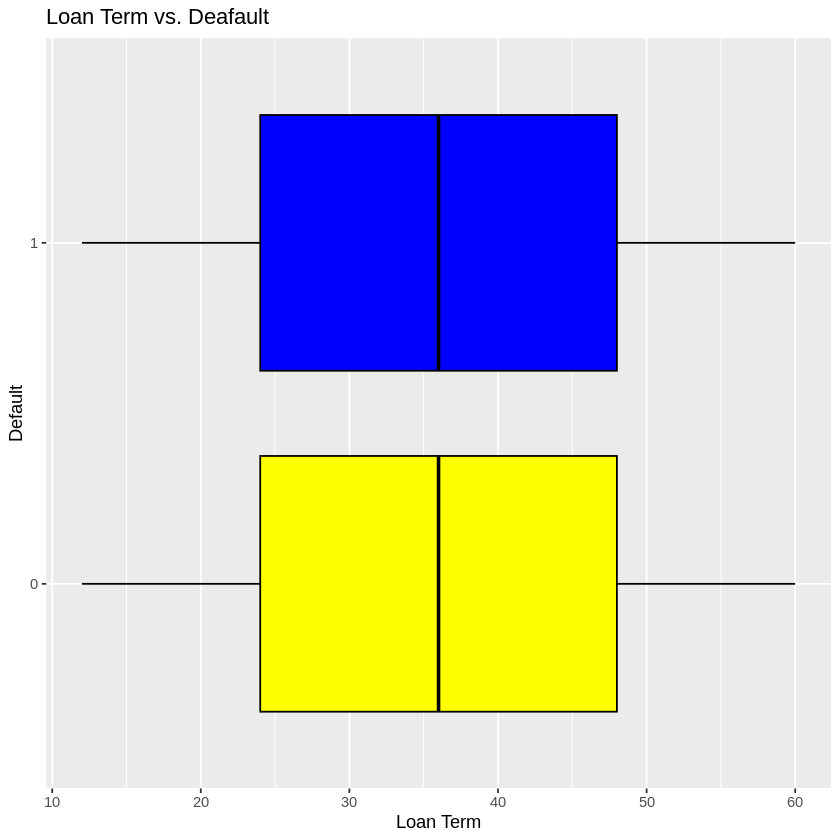

In [ ]:
ggplot(df, aes(x = LoanTerm, y = factor(Default))) +
  geom_boxplot(fill = c("yellow", "blue"), color = "black") +
  labs(title = "Loan Term vs. Deafault", x = "Loan Term", y = "Default") +
  scale_fill_manual( name = "Default", labels = c("0", "1")) +
  theme(legend.position = "none")

Here we plot the boxplot of column "LoanTerm" wrt Default

In [ ]:
ggplot(df, aes(x = Age, y = factor(Default))) +
  geom_boxplot(fill = c("yellow", "blue"), color = "black") +
  labs(title = "Loan Term vs. Deafault", x = "Loan Term", y = "Default") +
  scale_fill_manual( name = "Default", labels = c("0", "1")) +
  theme(legend.position = "none")

##Class Distributon

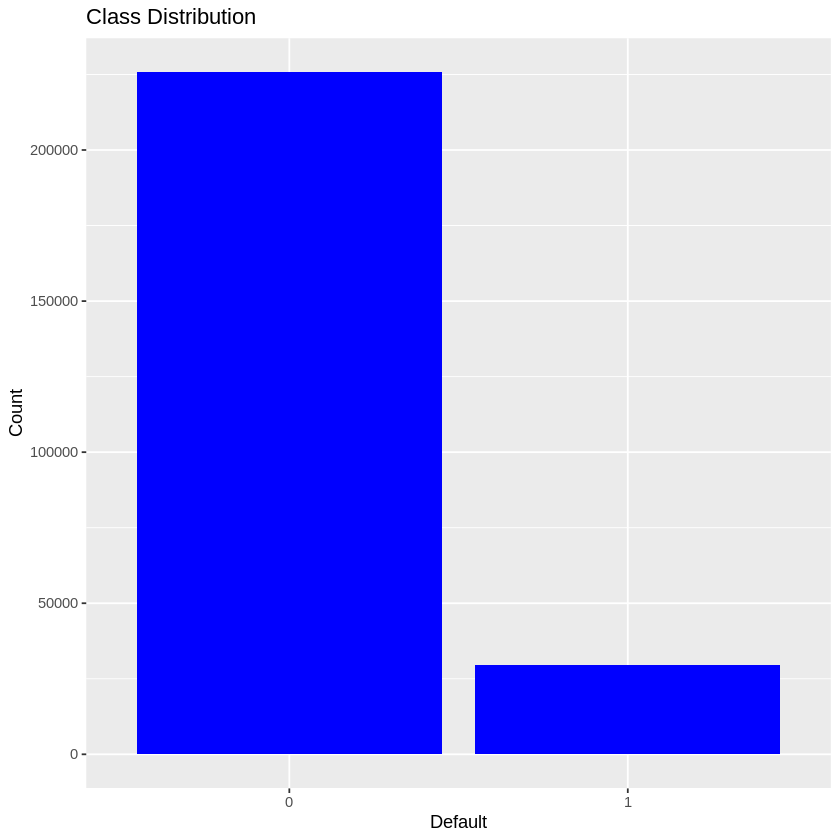

In [ ]:
ggplot(df, aes(x = factor(Default))) +
  geom_bar(fill = "blue") +
  labs(title = "Class Distribution", x = "Default", y = "Count")

##Bar Plot

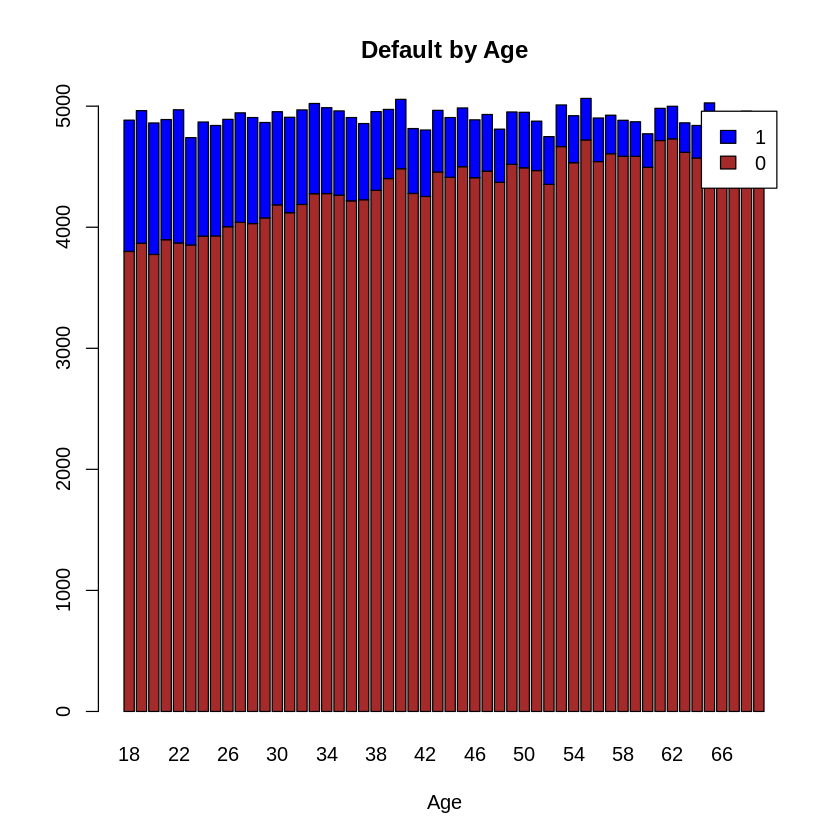

In [ ]:
counts <- table(df$Default, df$Age)
barplot(counts, main="Default by Age",
        xlab="Age", col=c("brown ","blue"),
        legend = rownames(counts))

Here we plot the barplot of column "Age" wrt Default

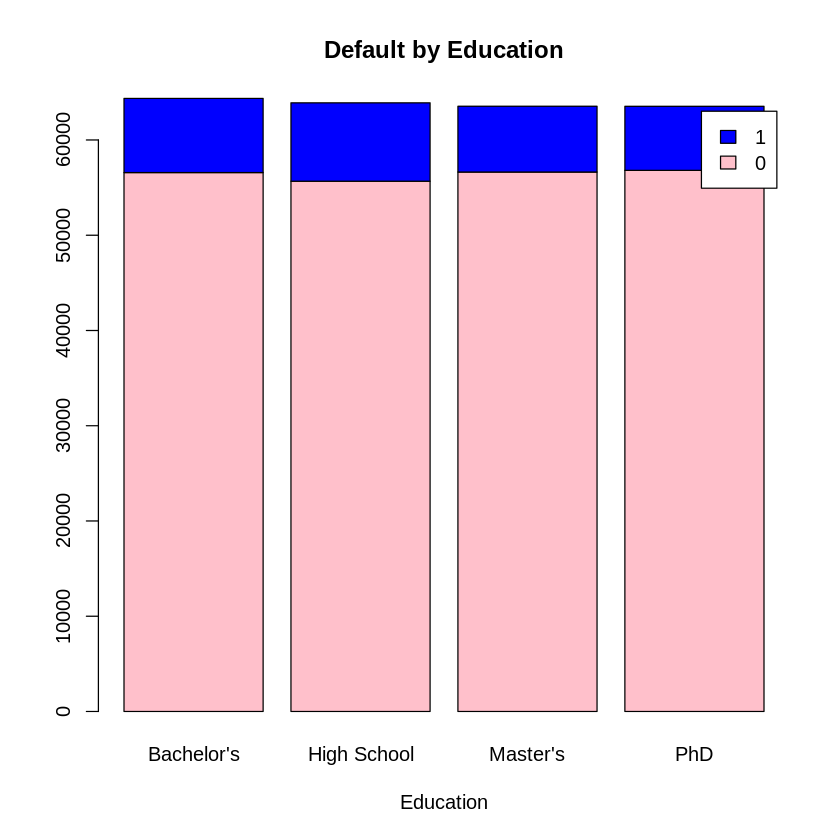

In [ ]:
counts <- table(df$Default, df$Education)
barplot(counts, main="Default by Education",
        xlab="Education", col=c("pink ","blue"),
        legend = rownames(counts))

Here we plot the barplot of column "Education" wrt Default

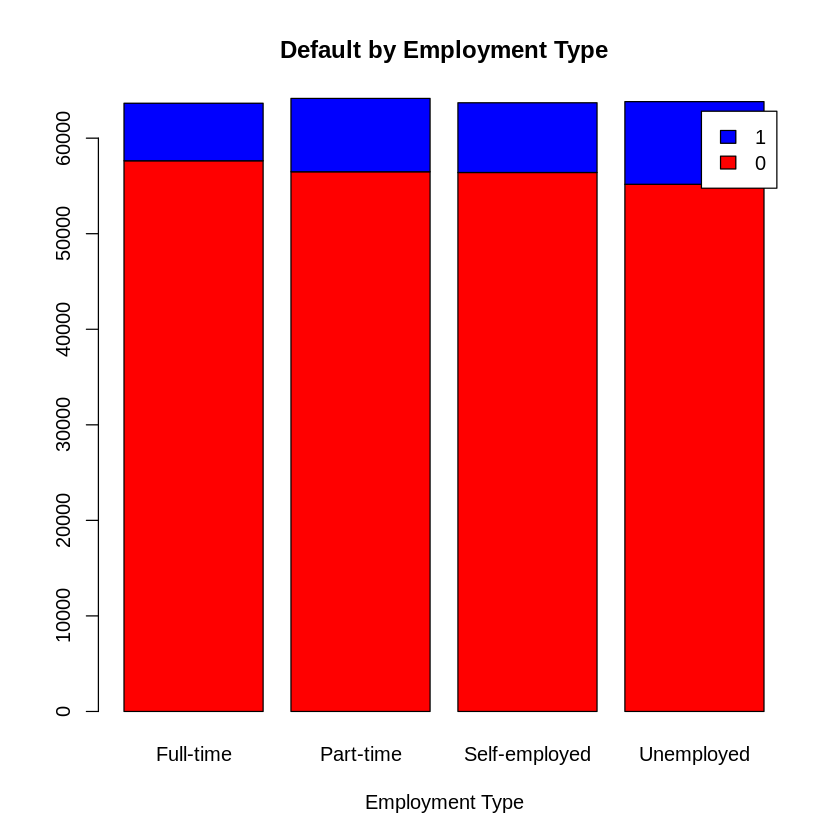

In [ ]:
counts <- table(df$Default, df$EmploymentType)
barplot(counts, main="Default by Employment Type",
        xlab="Employment Type", col=c("red","blue"),
        legend = rownames(counts))

Here we plot the barplot of column "EmploymentType" wrt Default

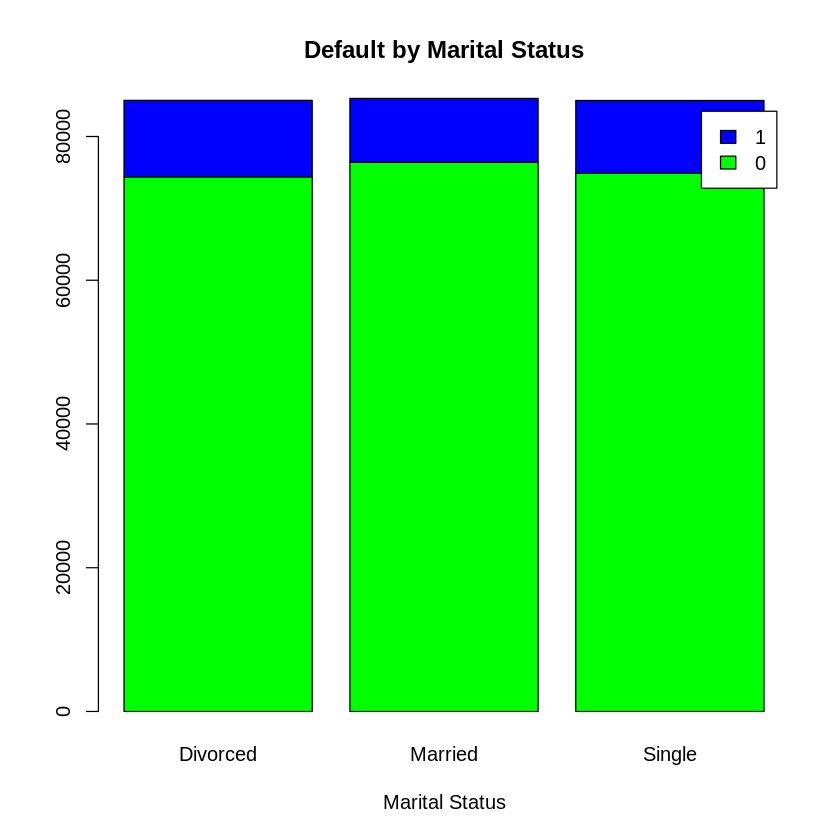

In [ ]:
counts <- table(df$Default, df$MaritalStatus)
barplot(counts, main="Default by Marital Status",
        xlab="Marital Status", col=c("green","blue"),
        legend = rownames(counts))

Here we plot the barplot of column "MaritalStatus" wrt Default

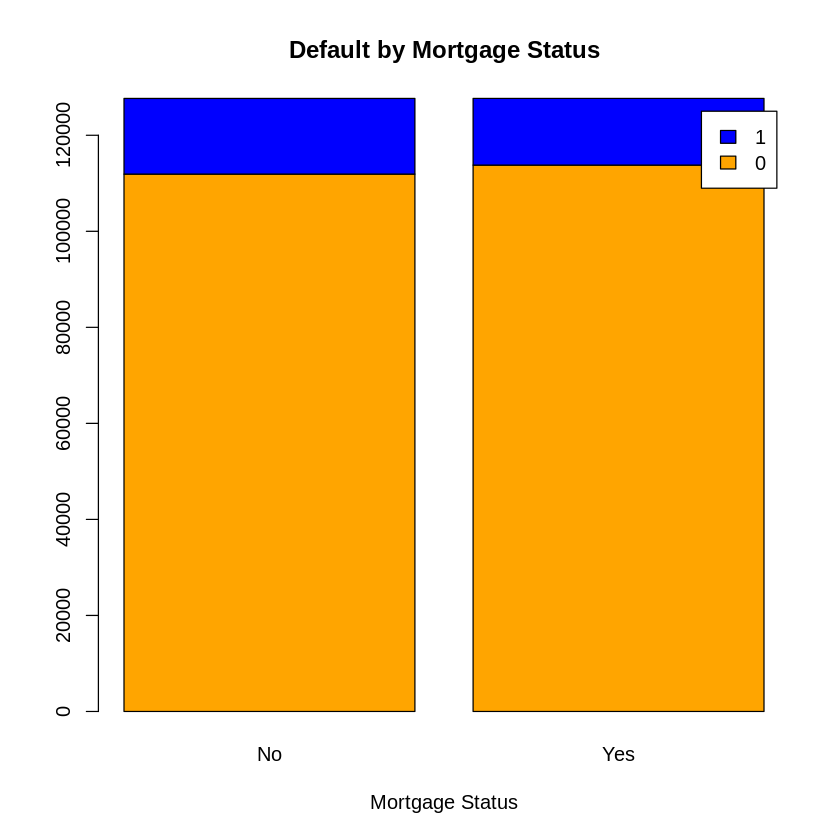

In [ ]:
counts <- table(df$Default, df$HasMortgage)
barplot(counts, main="Default by Mortgage Status",
        xlab="Mortgage Status", col=c("orange","blue"),
        legend = rownames(counts))

Here we plot the barplot of column "HasMortgage" wrt Default

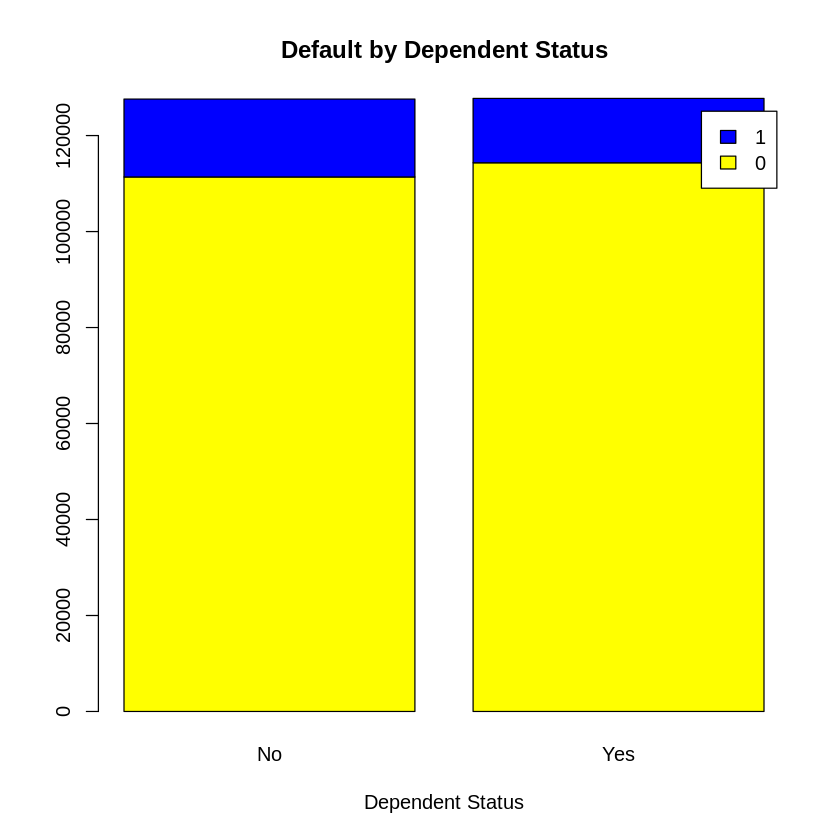

In [ ]:
counts <- table(df$Default, df$HasDependents)
barplot(counts, main="Default by Dependent Status",
        xlab="Dependent Status", col=c("yellow","blue"),
        legend = rownames(counts))

Here we plot the barplot of column "HAsDependents" wrt Default

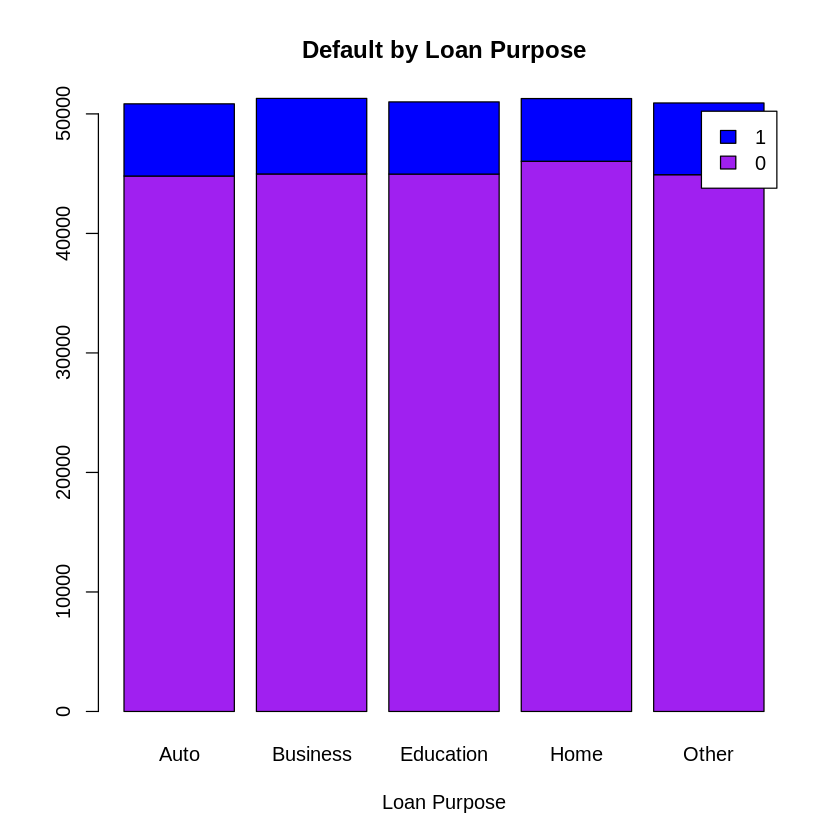

In [ ]:
counts <- table(df$Default, df$LoanPurpose)
barplot(counts, main="Default by Loan Purpose",
        xlab="Loan Purpose", col=c("purple","blue"),
        legend = rownames(counts))

Here we plot the barplot of column "LoanPurpose" wrt Default

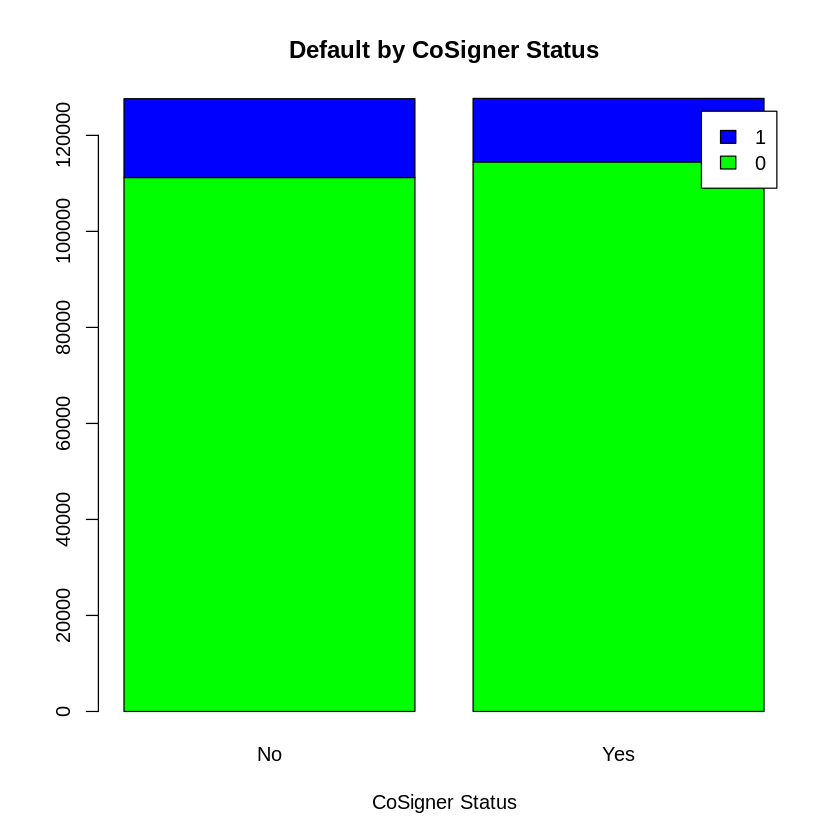

In [ ]:
counts <- table(df$Default, df$HasCoSigner)
barplot(counts, main="Default by CoSigner Status",
        xlab="CoSigner Status", col=c("green","blue"),
        legend = rownames(counts))

Here we plot the barplot of column "HasCoSigner" wrt Default

##Scatter Plots for Two Numerical Variables

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


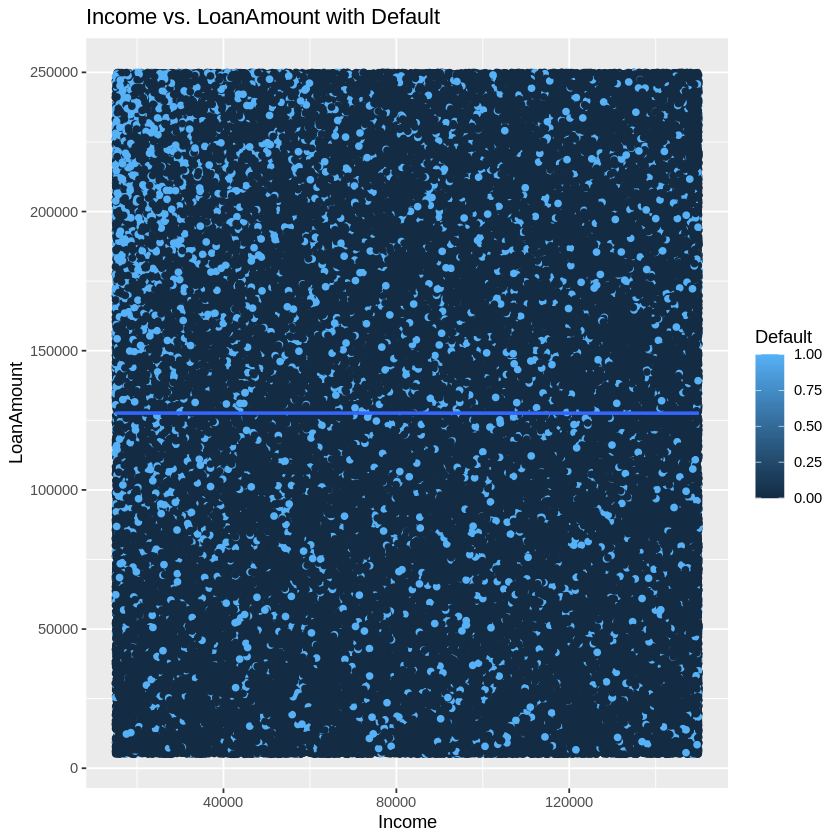

In [ ]:
ggplot(df, aes(x = Income, y = LoanAmount, color = Default)) +
  geom_point() +
  geom_smooth() +
  labs(title = "Income vs. LoanAmount with Default", x = "Income", y = "LoanAmount")

Here we have plot a scatterplot for column "Income" VS. "LoanAmount" wrt Default

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


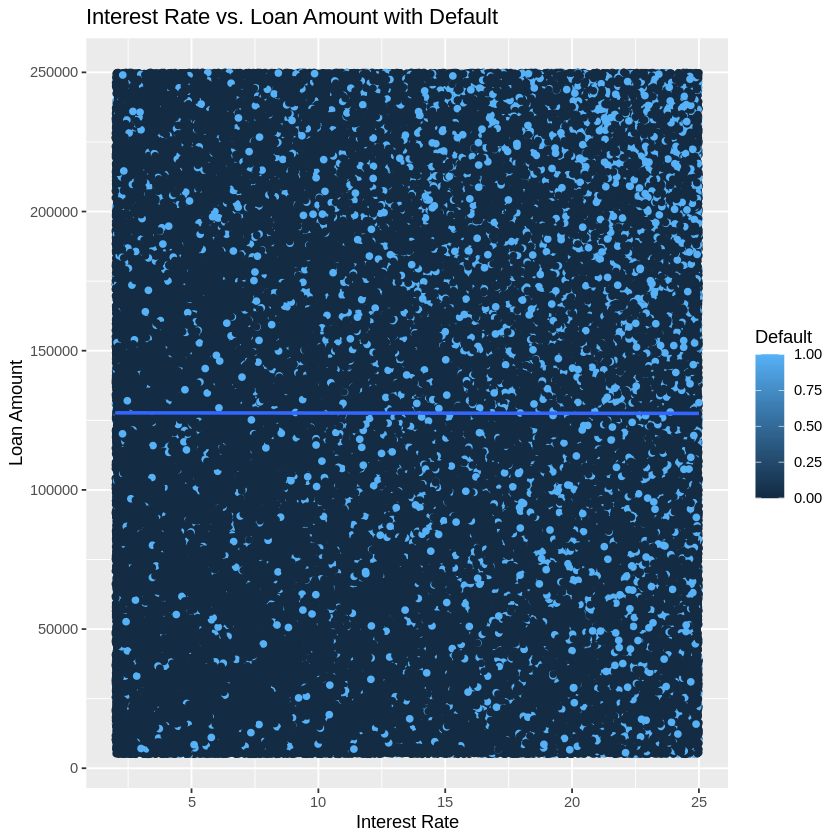

In [ ]:
ggplot(df, aes(x = InterestRate, y = LoanAmount, color = Default)) +
  geom_point() +
  geom_smooth() +
  labs(title = "Interest Rate vs. Loan Amount with Default", x = "Interest Rate", y = "Loan Amount")

Here we have plot a scatterplot for column "InterestRate" VS. "LoanAmount" wrt Default

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


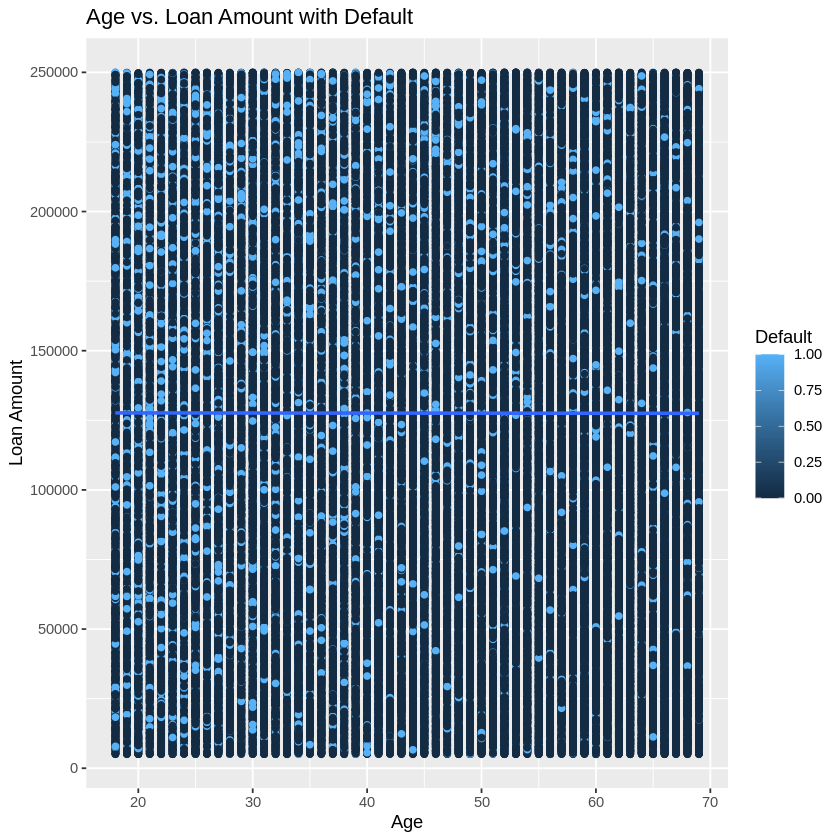

In [ ]:
ggplot(df, aes(x = Age, y = LoanAmount, color = Default)) +
  geom_point() +
  geom_smooth() +
  labs(title = "Age vs. Loan Amount with Default", x = "Age", y = "Loan Amount")

Here we have plot a scatterplot for column "Age" VS. "LoanAmount" wrt Default

##Density Plot

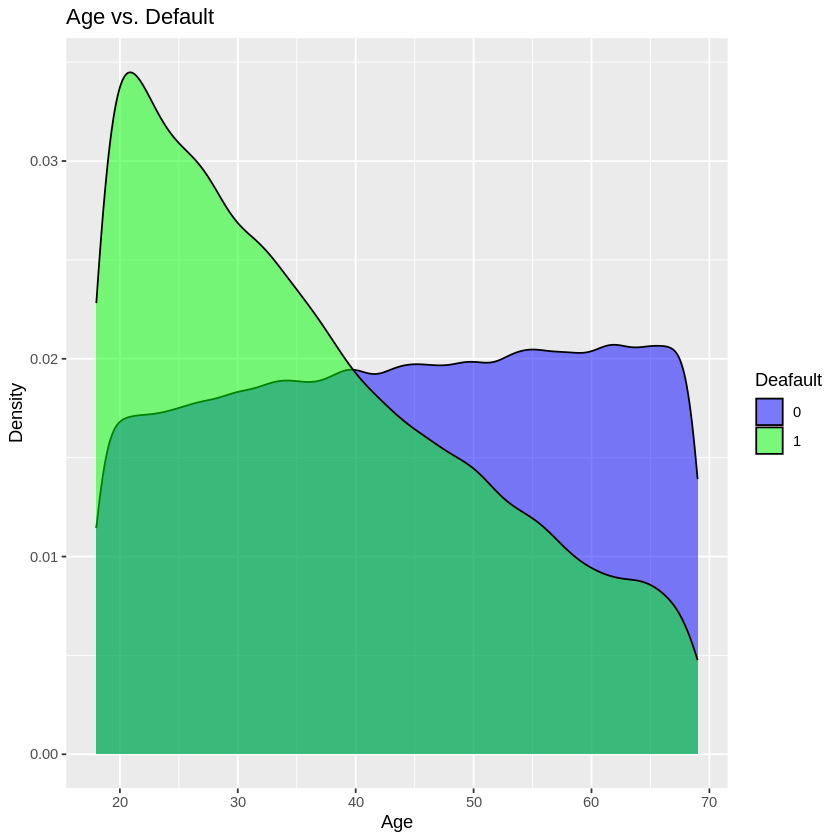

In [ ]:
ggplot(df, aes(x = Age, fill = factor(Default))) +
  geom_density(alpha = 0.5) +
  labs(title = "Age vs. Default", x = "Age", y = "Density") +
  scale_fill_manual(values = c("blue", "green"), name = "Deafault", labels = c("0", "1"))

Here we plot the Density plot for column "Age" wrt Default

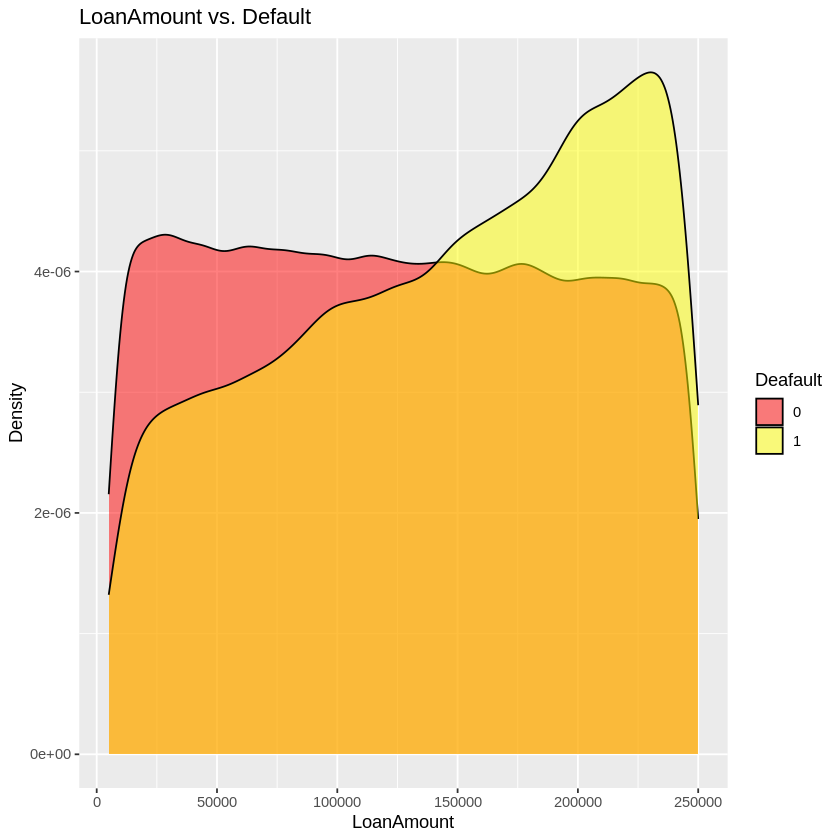

In [ ]:
ggplot(df, aes(x = LoanAmount, fill = factor(Default))) +
  geom_density(alpha = 0.5) +
  labs(title = "LoanAmount vs. Default", x = "LoanAmount", y = "Density") +
  scale_fill_manual(values = c("Red", "Yellow"), name = "Deafault", labels = c("0", "1"))

Here we plot the Density plot for column "LoanAmount" wrt Default

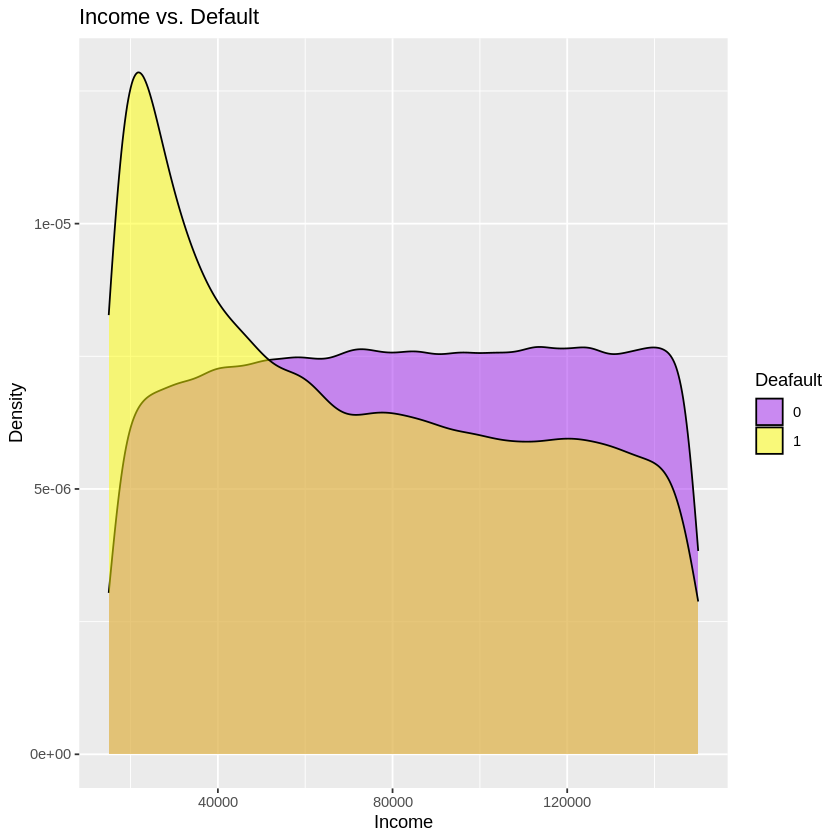

In [ ]:
ggplot(df, aes(x = Income, fill = factor(Default))) +
  geom_density(alpha = 0.5) +
  labs(title = "Income vs. Default", x = "Income", y = "Density") +
  scale_fill_manual(values = c("purple", "yellow"), name = "Deafault", labels = c("0", "1"))

Here we plot the Density plot for column "Income" wrt Default

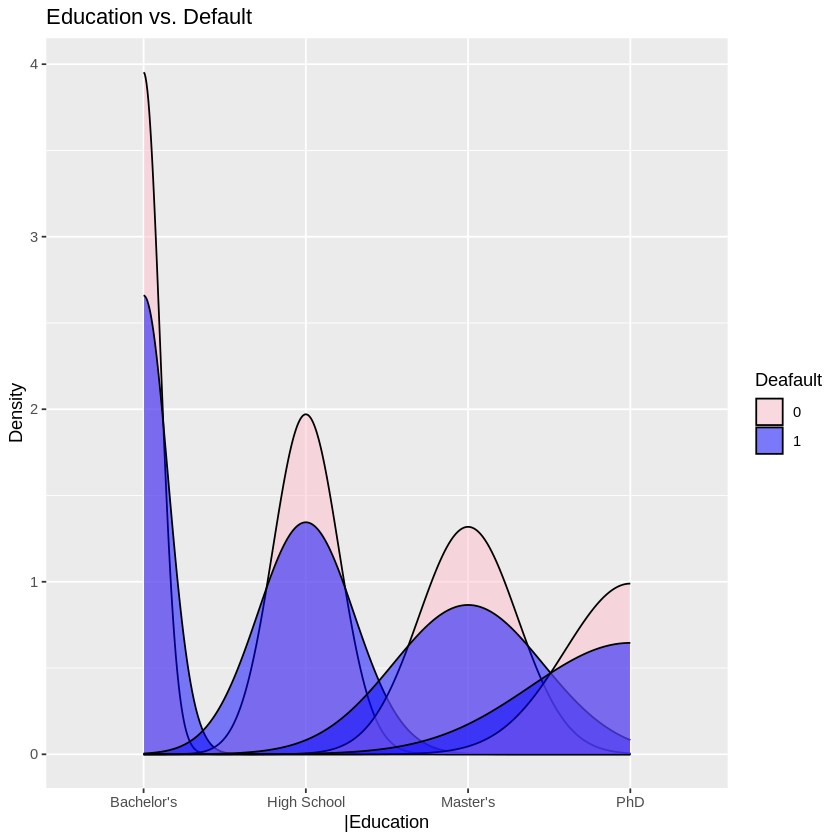

In [ ]:
ggplot(df, aes(x = Education, fill = factor(Default))) +
  geom_density(alpha = 0.5) +
  labs(title = "Education vs. Default", x = "|Education", y = "Density") +
  scale_fill_manual(values = c("pink", "blue"), name = "Deafault", labels = c("0", "1"))

Here we plot the Density plot for column "Education" wrt Default

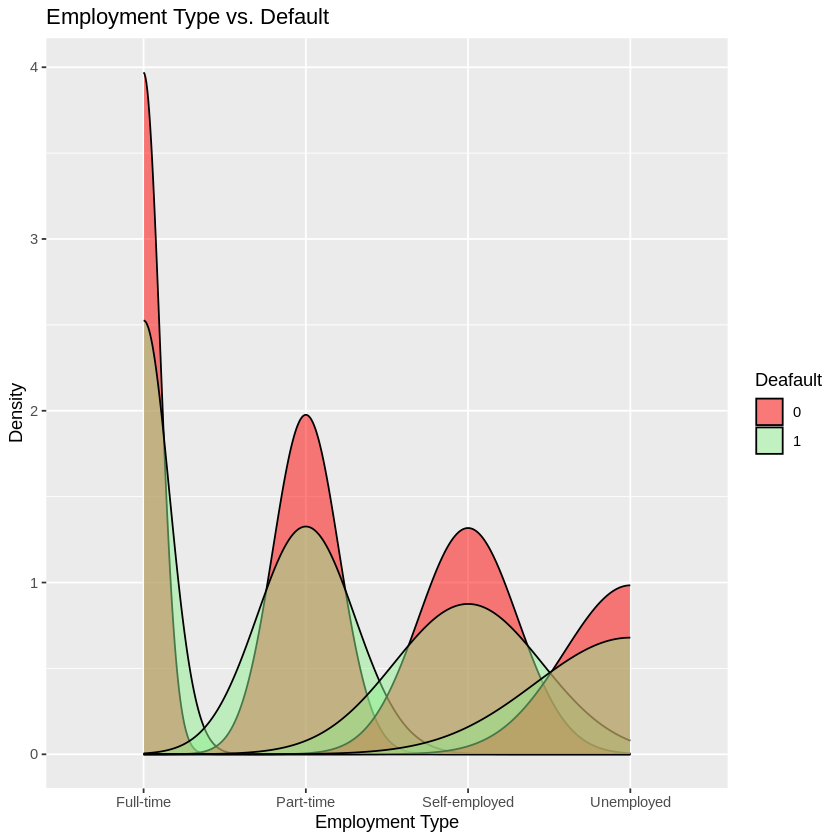

In [ ]:
ggplot(df, aes(x = EmploymentType, fill = factor(Default))) +
  geom_density(alpha = 0.5) +
  labs(title = "Employment Type vs. Default", x = "Employment Type", y = "Density") +
  scale_fill_manual(values = c("red", "light green"), name = "Deafault", labels = c("0", "1"))

Here we plot the Density plot for column "EmploymentType" wrt Default

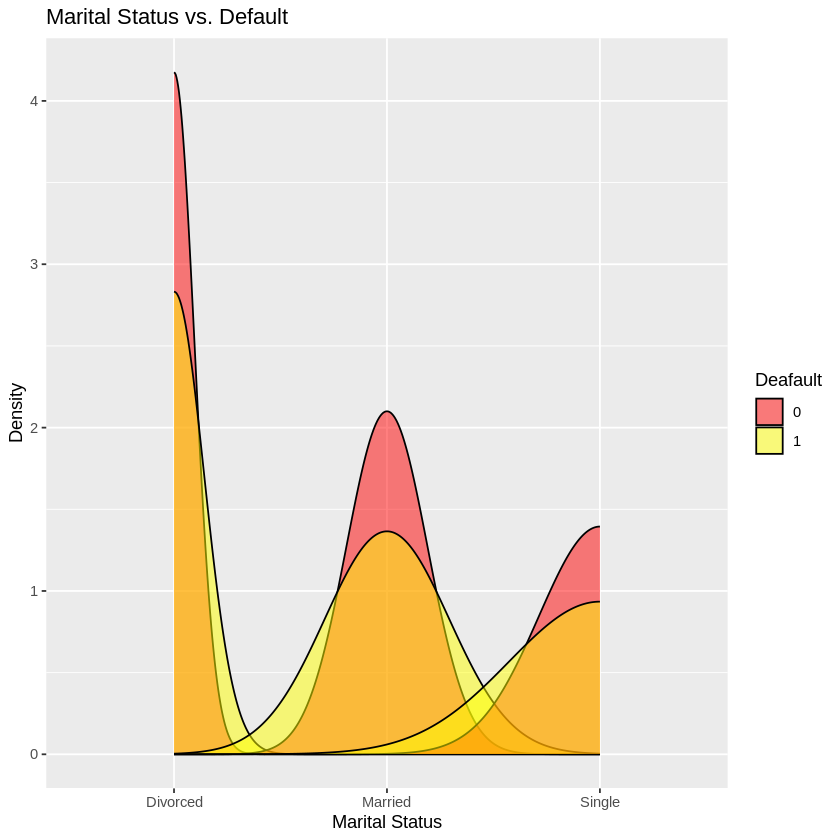

In [ ]:
ggplot(df, aes(x = MaritalStatus, fill = factor(Default))) +
  geom_density(alpha = 0.5) +
  labs(title = "Marital Status vs. Default", x = "Marital Status", y = "Density") +
  scale_fill_manual(values = c("red", "yellow"), name = "Deafault", labels = c("0", "1"))

Here we plot the Density plot for column "MaritalStatus" wrt Default

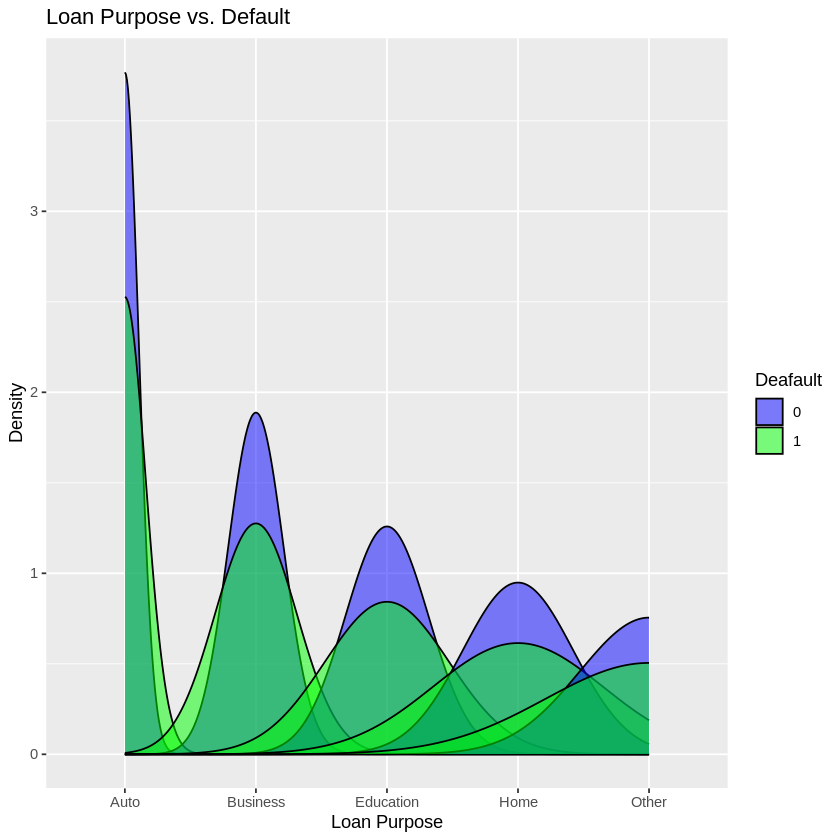

In [ ]:
ggplot(df, aes(x = LoanPurpose, fill = factor(Default))) +
  geom_density(alpha = 0.5) +
  labs(title = "Loan Purpose vs. Default", x = "Loan Purpose", y = "Density") +
  scale_fill_manual(values = c("blue", "green"), name = "Deafault", labels = c("0", "1"))

Here we plot the Density plot for column "LoanPurpose" wrt Default

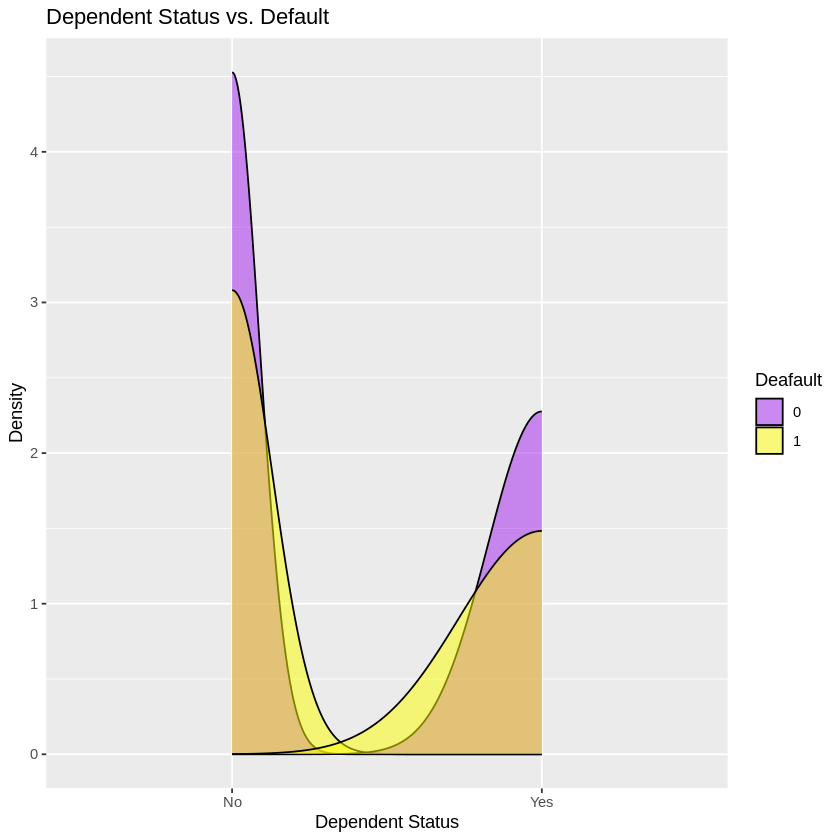

In [ ]:
ggplot(df, aes(x = HasDependents, fill = factor(Default))) +
  geom_density(alpha = 0.5) +
  labs(title = "Dependent Status vs. Default", x = "Dependent Status", y = "Density") +
  scale_fill_manual(values = c("purple", "yellow"), name = "Deafault", labels = c("0", "1"))

Here we plot the Density plot for column "HasDependents" wrt Default